<a href="https://colab.research.google.com/github/JorgeRdzR/Pruebas/blob/main/Caso_4_Regresi%C3%B3n_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso 4. Regresión Lineal Simple

## Objetivo 

Realizar una tarea de predicción de casos confirmados mediante el algoritmo de machine learnig de regresión lineal simple.

## Descripción

* Cargar datos de cantidad de habitantes de una pobación y sus casos confirmados de COVID.
Los datos son casos confirmados en periodo de 02-02-2020 al 18-09-2021 en formado DD-MM-AAAA (dia-mes-año).
* Archivo csv localizado en: [github](https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados.csv).
* Fuente obtenida de datos del gobierno de México de [texto del vínculo](https://datos.covid-19.conacyt.mx/#DownZCSV).
* Explorar los datos.
* Definir la varible independiente y la variable dependiente.
* Aplicar el modelo de regresión lineal simple.
* Evaluar el modelo, con error cuadrado medio y su significado.
* Hacer estimaciones para una cirta cantidad de población para determinar cuantos casos confirmados serían. Son Predicciones.




## Fundamento Teórico

Pendiente


## Desarrollo

### Librerías




In [1]:
# Datos
import numpy as np
import pandas as pd
import seaborn as sb

# Gráficos
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Regresiones lineales
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Cargar los datos



In [2]:

datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/poblacion%20confirmados.csv")

datos.shape # La estructura de los datos 



(32, 4)

In [3]:
datos[["poblacion", "confirmados"]].describe() # Estadísticos elementales

,poblacion,confirmados
count,3.200000e+01,32.000000
mean,3.993509e+06,111552.406250
std,3.339196e+06,162782.981721
min,7.851530e+05,21443.000000
25%,1.832562e+06,46325.000000
50%,3.121544e+06,69892.500000
75%,5.021589e+06,107953.250000
max,1.742779e+07,931135.000000


In [4]:
datos

,cve_ent,nombre,poblacion,confirmados
0,1,AGUASCALIENTES,1434635,32795
1,2,BAJA CALIFORNIA,3634868,59049
2,3,BAJA CALIFORNIA SUR,804708,54730
3,4,CAMPECHE,1000617,21961
4,7,CHIAPAS,5730367,21443
5,8,CHIHUAHUA,3801487,64386
6,9,DISTRITO FEDERAL,9018645,931135
7,5,COAHUILA,3218720,86766
8,6,COLIMA,785153,30069
9,10,DURANGO,1868996,46394


### Visualización de datos

#### Histograma

Se visualizan los histogramas únicamente de las variables numericas dependiente e independiente.



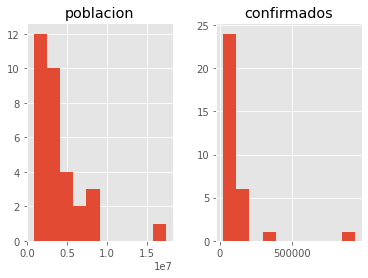

In [5]:
# datos.drop(['cve_ent','nombre'],1).hist()
datos[["poblacion", "confirmados"]].hist()
plt.show()

Las variables no tienen un comportamiento gaussinado o que parten de una distribución normal lo que conlleva a dudar de si vale la pena aplicar regresión lienal simple.

Diagrama de dispersión


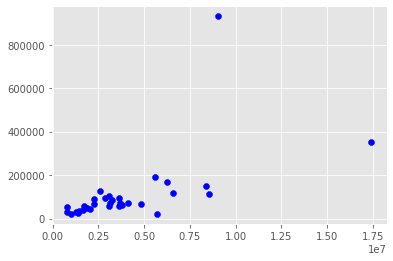

In [6]:
plt.scatter(datos['poblacion'], datos['confirmados'], c='blue')
plt.show()

### Aplicar modelos de regresión

Se utiliza la función linear_model.LinearRegression() para construir la regresión lineal.

Se almacena la regresiín en una variable llamada regr

Se construye un modelo de entrenamiento con todos los datos.

In [7]:
regr = linear_model.LinearRegression()
X_train = np.array(datos['poblacion'])

X_train

y_train = np.array(datos['confirmados'])
y_train






array([ 32795,  59049,  54730,  21961,  21443,  64386, 931135,  86766,
        30069,  46394, 166331,  73397,  58760, 148185, 353717,  69115,
        46118,  31851, 192059,  73852, 115456,  90915,  57020,  96746,
        70670, 105906, 128415,  93751,  27541, 114095,  67103,  39946])

In [8]:
regr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Objeto de prediccion

Se construye objeto de prediccion para construir la recta lineal



In [9]:
y_pred = regr.predict(X_train.reshape(-1, 1))
y_pred


array([ 39204.94607726, 101412.49253176,  21394.91726874,  26933.88437739,
       160658.87752275, 106123.33869338, 253628.89771621,  89646.67225639,
        20842.03556443,  51485.70547207, 174733.4842964 , 102039.59128919,
        85905.96314003, 236411.8985036 , 491382.02578499, 135072.62620993,
        56435.26194969,  35075.25478305, 157260.04749453, 115795.75742692,
       185371.99701288,  63095.82543829,  47365.25950219,  79678.17695892,
        87892.43557904,  85576.04359988,  71369.96661784, 101857.34247989,
        37660.5528164 , 240092.18787042,  62515.12294149,  45758.41082405])

### Evaluar el modelo

Se muestran los valores de los coeficientes de la ecuación 

$$
Y = \beta0 + \beta1\cdot{x_i}
$$

In [10]:
print('Coefficients: \n', regr.coef_)

# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
 
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
 
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.02827316]
Independent term: 
 -1356.7232585593447
Mean squared error: 17035583585.45
Variance score: 0.34


$$ \beta0 = -1356.7232585593447$$
$$\beta1 = 0.02827316$$


$$
Y = -1356.7232585593447 + 0.02827316 \cdot{x_i}
$$

¿Cuántos casos confirmados debiera para una pobción 500000



$$ Y = -1356.7232585593447 + 0.02827316 \times{500000}$$
$$ 12779.86 = -1356.7232585593447 + 0.02827316 \times{500000} $$


### Visualizar recta





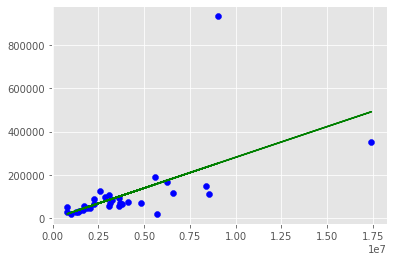

In [11]:
plt.scatter(datos['poblacion'], datos['confirmados'], c='blue')
plt.plot(X_train, y_pred, c='green')
plt.show()

### Predecir valores

¿Cual es la prediccion de casos confirmados para una pobacion de 500000?

¿Cual es la prediccion de casos confirmados para una pobacion de 1,000,000?

¿Cual es la prediccion de casos confirmados para una pobacion de 2,000,000?






In [12]:
prediccion = regr.predict([[500000]])
print(int(prediccion))


12779


In [13]:
prediccion = regr.predict([[1000000]])
print(int(prediccion))


26916


In [14]:
prediccion = regr.predict([[2000000]])
print(int(prediccion))


55189


## Interpretación
La regresión lineal nos aayuda con predicciones por medio de los minimos cuadrados, para ello debemos identificar $ b0$ y $b1$ que nos permite hacer las predicciones para culaquier valor de  $x_i$.
Para este caso se utilizaron diferentes librerias, para gráficar y para hacer los cálculos. Primero se hizo un histograma de población Vs confirmados, despues un diagrama de dispersión para despues aplicar el modelo de regresión, se evalua el modelo con la formula:$
Y = \beta0 + \beta1\cdot{x_i}
$ 
visualizamos la recta y empezamos a predecir valores, dando como resultado:


* Para una poblacion de 500,000: 12779
* Para una población de 1,000,000: 26916
* Para una población de 2,000,000: 55189

El objetivo de un modelo de regresión es tratar de explicar la relación que existe entre una
variable dependiente (variable respuesta) Y un conjunto de variables independientes (variables
explicativas) $X_1,..., X_n.$


